In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_added2/added_hhdata_86_2.csv')

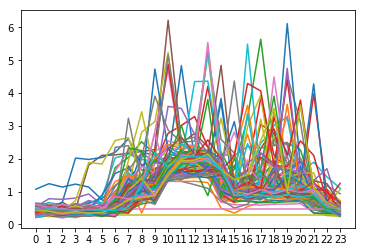

In [3]:
#plot household demand of every 24 hours
fig, ax = plt.subplots()
for i in range(0,2400,24):
    #print("-----------------")
    use=df['use'][i:i+24]
    hour=range(24)
    ax.plot(hour, use)
    #print(hour)
    #print(use)
plt.xticks(hour, ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'))
plt.savefig("daily_home_use.jpg")
plt.show()

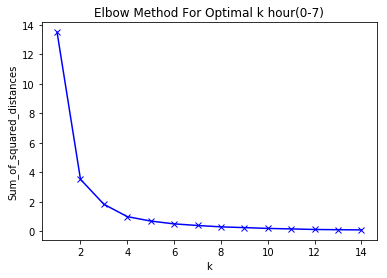

In [12]:
#choose three period 0-7, 7-15, 15-23
#time interval 0-7 for the first 100 days
X=[]
for i in range(0,2400,24):
    for j in range(8):
        #X = np.append (X, [[j, df['use'][i+j]]])
        X.append([df['use'][i+j]])
        
#print(X)
mms = MinMaxScaler()
mms.fit(X)
data_transformed = mms.transform(X)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k hour(0-7)')
plt.savefig('0-7.jpg')
plt.show()

In [4]:
#choose K=3, apply k-mean for label and center
X=[]
for i in range(0,2400,24):
    for j in range(8):
        X.append([df['use'][i+j]])


X = np.array(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels=kmeans.labels_
#print(labels)
centers=kmeans.cluster_centers_
#print(centers)

In [5]:
#count the transitions
transition_count=np.zeros((3,3),dtype=np.int)
for i in range(0,len(labels),8):
    for j in range(7):
        row=labels[i+j]
        column=labels[i+j+1]
        #print(row,column)
        transition_count[row][column]=transition_count[row][column]+1

In [13]:
#get the destribution
distribution=transition_count/(7*(2400/24))
print("Distribution table is")
print(distribution)
print("Distribution sum", distribution.sum())
print("Three levels to choose")
print(centers)

Distribution table is
[[0.83142857 0.09857143 0.01142857]
 [0.00428571 0.02857143 0.00714286]
 [0.         0.         0.01857143]]
Distribution sum 0.9999999999999999
three levels to choose
[[0.41375897]
 [1.12424926]
 [2.13694551]]
